## Workshop 4: Optional material
### File Input and Output (I/O)


In this notebook, we're going to explore some ways that we can store data in files, and extract data from files. Let's just get all of the importing out of the way:

In [4]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Practice: Writing and Reading CSV files

CSV stands for Comma Separated Values. Python's `csv` module allows easy reading and writing of sequences. CSV is especially useful for loading data from spreadsheets and databases.

Let's make a list and write a file!  
First, we need to load a new module that you have not used yet in this course: `csv`

In [5]:
import csv

Next, just as before we need to create an abstract file object that opens the file we want to write to.  
Then, we create another programming abstraction called a *csv writer*, a special object that is built specifically to write sequences to our csv file. In this example, we have called the abstract file object `f_csv` and we have called the abstract csv writer object `SA_writer`

In [6]:
f_csv = open( 'nationData.csv', 'w' )
SA_writer = csv.writer( f_csv,                 # write to this file object
                           delimiter = '|',          # place vertical bar between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )# made up of multiple words 

Make sure that you understand at this point that all we have done is create a writer. It has not written anything to the file yet. So let's try to write the following lists of data:

In [7]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',\
             'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
capitals = ['Buenos Aires', 'Sucre', 'Brasília', 'Santiago', 'Bogotá', 'Quito', 'Georgetown',\
             'Asunción', 'Lima', 'Paramaribo', 'Montevideo', 'Caracas']
population_mils = [ 42.8, 10.1, 203.4, 16.9, 46.4, 15.0, 0.7, 6.5, 29.2, 0.5,\
                      3.3, 27.6]

Now let's figure out how to add a line to our CSV file. For a regular ASCII file, we added lines by calling the `write` function. For a CSV file, we use a function called `writerow` which is attributed to our abstract csv writer `SA_writer`:

In [8]:
SA_writer.writerow(['Data on South American Nations'])
SA_writer.writerow(['Country', 'Capital', 'Populaton (millions)'])
for i in range(len(countries)):
    SA_writer.writerow( [countries[i], capitals[i], population_mils[i]] )
f_csv.close()

Now let's see if we can open your file using a SpreadSheet program. If you don't have access to one, find someone who does!   

* Download nationData.csv
* Open Microsoft Excel (or equivalent), and select "Import Data."  
* Locate nationData.csv in the list of files that pops up.  
* Select the "Delimited" Option in the next dialog box, and hit "Next"
* Enter the appropriate delimiter in the next pop-up box, and hit finish.

How did we do?

**Practice 5:** Use syntax learned above to generate a csv file called `sine.csv` with pairs of x and y values separated by a comma. It should end up looking sort of like

    0.0,0.0
    1.57079632679,1.00000000
Notice a few things: we don't need to use any formatting of the numbers. It doesn't matter how many decimal places each value has on each line. Python will just use the comma to figure out where one number ends and another begins

We can use a similar process to *read* data from a csv file back into Python. Let's read in a list of the most populous cities from `cities.csv` and store them for analysis.

In [9]:
cities = []
cityPops = []
metroPops = []

In [10]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )

# The following line is how we skip a line in a csv. It is the equivalent of readline from before.
next(readCity) # skip the header row


for row in readCity:
    print(row)
f_csv.close()    

['Shanghai', 'China', '24.3', '24.8']
['Lagos', 'Nigeria', '21.3', '21']
['Delhi', 'India', '16.8', '21.8']
['Istanbul', 'Turkey', '14.4', '14.4']
['Tokyo', 'Japan', '13.3', '36.9']
['Mumbai', 'India', '12.5', '20.7']
['Sao Paulo', 'Brazil', '11.9', '20.9']
['Beijing', 'China', '21.5', '21.1']
['Shenzhen', 'China', '10.8', '10.6']
['Seoul', 'South Korea', '10.3', '25.6']
['Jakarta', 'Indonesia', '10', '10.1']
['Guangzhou', 'China', '9.9', '23.9']
['Mexico City', 'Mexico', '8.9', '21.2']
['Lima', 'Peru', '8.7', '9.9']
['London', 'United Kingdom', '8.5', '14']
['New York City', 'United States', '8.5', '20.1']
['Bengaluru', 'India', '8.4', '8.7']
['Bangkok', 'Thailand', '8.3', '8.3']


Look at the output of the code above. Every `row` that is read in is a `list` of `strings` by default again. So in order to use the numbers *as numbers* we need to convert them using the `float()` operation. Below, we use this to figure out which city has the largest city population:

In [11]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )

largest_city_pop = 0.0
city_w_largest_pop = None

# The following line is how we skip a line in a csv. It is the equivalent of readline from before.
next(readCity) # skip the header row


for row in readCity:
    city_country = ', '.join(row[0:2]) # joins the city and country strings using a comma, like "Shanghai, China"
    cityPop =  float(row[2])
    metroPop = float(row[3])
    
    # if the population of this city is the largest seen so far, update
    if cityPop > largest_city_pop:
        largest_city_pop = cityPop
        city_w_largest_pop = city_country
f_csv.close()

print("The city with the largest population is: %s with a population of %.1f million people" % (city_w_largest_pop, largest_city_pop))

The city with the largest population is: Shanghai, China with a population of 24.3 million people


**Practice 6:** Use the syntax learned above to read in the x and y values from your `sine.csv` file. Plot your data to be sure you did everything correctly.

In [ ]:
# Code for Practice 6

## Practice reading csv and xls files with Pandas

Pandas is a useful package for data analysis. The data in Pandas are organized in a <i>dataframe</i> or a <i>timeseries</i> object. The dataframe has a logical structure of a spreadsheet (or a table). Here is how you can read the same file in Pandas:

In [3]:
import pandas as pd

df = pd.read_csv('cities.csv',delimiter=',')
df

,City,Country,Population (city),Population (metro area)
0,Shanghai,China,24.3,24.8
1,Lagos,Nigeria,21.3,21.0
2,Delhi,India,16.8,21.8
3,Istanbul,Turkey,14.4,14.4
4,Tokyo,Japan,13.3,36.9
5,Mumbai,India,12.5,20.7
6,Sao Paulo,Brazil,11.9,20.9
7,Beijing,China,21.5,21.1
8,Shenzhen,China,10.8,10.6
9,Seoul,South Korea,10.3,25.6


You can also read an xls (or xlsx, or odp) file directly:

In [26]:
df = pd.read_excel('cities.xlsx')
df

,City,Country,Population (city),Population (metro area)
0,Shanghai,China,24.3,24.8
1,Lagos,Nigeria,21.3,21.0
2,Delhi,India,16.8,21.8
3,Istanbul,Turkey,14.4,14.4
4,Tokyo,Japan,13.3,36.9
5,Mumbai,India,12.5,20.7
6,Sao Paulo,Brazil,11.9,20.9
7,Beijing,China,21.5,21.1
8,Shenzhen,China,10.8,10.6
9,Seoul,South Korea,10.3,25.6


<a id='exercises'></a>

Using the Pandas dataframe is fairly easy. You can address the contents of a column by name, and make selections (slices) on the values, compute maxima, plot, etc. The numerical columns are automatically converted to `float` or `int` types

In [27]:
type(df["Population (city)"][0])

numpy.float64

In [43]:
maxPopIdx = df["Population (city)"].idxmax()
print("The city with the largest population is: {city:s}, {country:s} with a population of {pop:.1f} million people".
      format(city=df["City"][maxPopIdx],
             country=df["Country"][maxPopIdx],
             pop=df["Population (city)"][maxPopIdx]))

The city with the largest population is: Shanghai, China with a population of 24.3 million people


### Practice

Write the code to find the largest metropolitan area

### Plotting with Pandas

Pandas also has a convenient interface to plotting

<AxesSubplot: xlabel='City'>

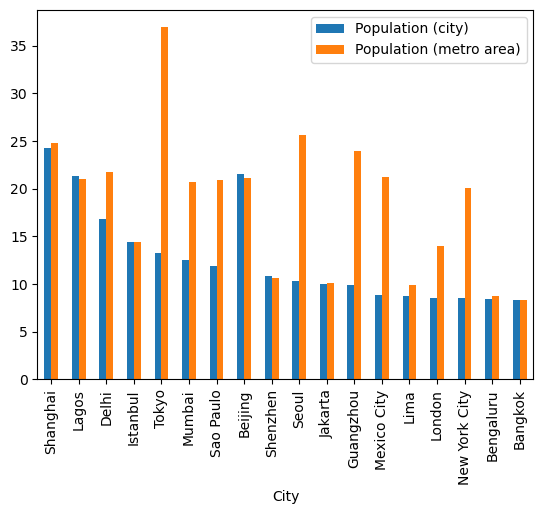

In [45]:
df.plot.bar(x='City',y=['Population (city)','Population (metro area)'])

## Practice With HDF5 Files

So far you have encountered a standard ASCII text file and a CSV file. The next file format is called an HDF5 file. HDF5 files are ideally suited for managing large amounts of complex data. Python can read them using the module `h5py.`

In [29]:
import h5py

Let's load our first hdf5 file into an abstract file object. We call ours `fh5` in the example below:

In [30]:
fh5 = h5py.File( 'solar.h5py', 'r' )

Here is how data is stored in an HDF5 file:
    hdf5 files are made up of data sets
    Each data set has a name. The correct Python terminology for this is "key". Let's take a look at what data sets are in `solar.h5py`. You can access the names (keys) of these data sets using the `.keys()` function:

In [31]:
for k in fh5.keys(): # loop through the keys
    print(k)

TOrbit_yr
density
mass_earthM
names
solar_AU
surfT_K


To access one of the 6 data sets above, we need to use its name from above. Here we access the data set called `"names"`:

In [32]:
for nm in fh5["names"]: # make sure to include the quotation marks!
    print(nm)

b'Mercury'
b'Venus'
b'Earth'
b'Mars'
b'Jupiter'
b'Saturn'
b'Uranus'
b'Neptune'


So the dataset called `"names"` contains 8 elements (poor Pluto) which are strings. In this HDF5 file, the other data sets contain `float` values, and can be treated like numpy arrays:

In [33]:
print(fh5["solar_AU"][::2])
print(fh5["surfT_K"][fh5["names"]=='Earth'])

[ 0.38709894  1.0000001   5.203363   19.191263  ]
440.0


Let's make a plot of the solar system that shows each planet's:  
* distance from the sun (position on the x-axis)
* orbital period (position on the y-axis
* mass (size of scatter plot marker)
* surface temperature (color of marker)
* density (transparency (or alpha, in matplotlib language))

In [34]:
distAU = fh5["solar_AU"][:]
mass = fh5["mass_earthM"][:]
torb = fh5["TOrbit_yr"][:]
temp = fh5["surfT_K"][:]
rho = fh5["density"][:]
names = fh5["names"][:]

In [35]:
def get_size( ms ):
    m = 400.0/(np.max(mass) - np.min(mass))
    return 100.0 + (ms - np.min(mass))*m 
def get_alpha( p ):
    m = .9/(np.max(rho)-np.min(rho))
    return .1+(p - np.min(rho))*m

In [36]:
alfs = get_alpha(rho)

Text(0.5, 1.0, 'Our solar system')

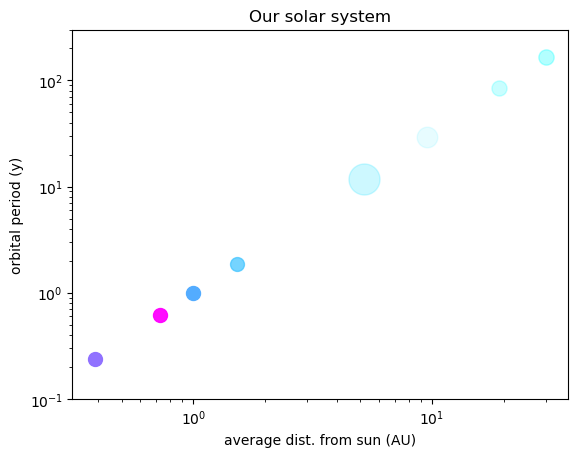

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=np.min(temp), vmax=np.max(temp))
cmap = plt.cm.cool
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(1)
for i in range(8):
    ax.scatter( distAU[i], torb[i], s = get_size(mass[i]), color = m.to_rgba(temp[i]), alpha=alfs[i] ) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1,300)
ax.set_ylabel( 'orbital period (y)' )
ax.set_xlabel( 'average dist. from sun (AU)' )
ax.set_title( 'Our solar system' )

Play around with the data and see what interesting relationships you can find!

If you ever want to write your own HDF5 file, you can open an h5py file object by calling:  

    fh5 = h5py.File('filename.h5py', 'w')  
    
Data sets are created with

    dset = fh5.create_dataset( "dset_name", (shape,))
    
The default data type is float.  
The values for the data set are then set with:  

    dset[...] = (  )  
    
where the parenthesis contain an array or similar data of the correct shape. After you've added all your data sets, close the file with  

    fh5.close()  
If you have extra time, try creating your own data set and read it back in to verify that you've done it correctly!

## Practice With Binary Files

So far, we've been dealing with text files. If you opened these files up with a text editor, you could see what was written in them. Binary files are different. They're written in a form that Python (and other languages) understand how to read, but we can't access them directly.  The most common binary file you'll encounter in python is a *.npy* file, which stores numpy arrays. You can create these files using the command `np.save( filename, arr )`. That command will store the array `arr` as a file called filename, which should have the extension .npy. We can then reload the data with the command `np.load(filename)`

In [38]:
x = np.linspace(-1, 1.0, 100)
y = np.sin(10*x)*np.exp(-x) - x
xy = np.hstack((x,y))

In [39]:
# save the array
np.save('y_of_x.npy', xy )

In [40]:
del x, y, xy # erase these variables from Python's memory

Now reload the data and check that you can use it just as before.

Bonus challenge! Load the file `mysteryArray.npy`, and figure out the best way to plot it.  
**Hint:** look at the shape of the file, and the dimensions. 

In [41]:
data = np.load('mysteryArray.npy')